In [2]:
# Membaca data
import pandas as pd
import numpy as np
df = pd.read_csv(r"D:\Prediksi Status Gizi\Notebook Pengerjaan\dataset status gizi balita.csv")
print(df.head())

  Jenis_Kelamin  Usia  Berat_Badan_Lahir  Tinggi_Badan_Lahir  Berat_Badan  \
0     Laki-laki    35                2.8                  49         10.5   
1     Laki-laki    44                3.0                  49          7.1   
2     Perempuan    47                2.8                  49          7.0   
3     Perempuan    41                3.0                  49          7.1   
4     Perempuan    42                2.8                  49         10.0   

   Tinggi_Badan Status_Pemberian_ASI Status_Tinggi_Badan  \
0          72.2                Tidak       Sangat pendek   
1          72.2                Tidak       Sangat pendek   
2          92.7                Tidak              Pendek   
3          73.5                Tidak       Sangat pendek   
4          65.0                Tidak       Sangat pendek   

          Status_Berat_Badan          Status_Gizi  
0         Berat badan kurang  Berisiko gizi lebih  
1  Berat badan sangat kurang          Gizi kurang  
2  Berat badan sanga

In [3]:
# cek jumlah data
df.shape

(8013, 10)

In [4]:
# Cek tipe data
print("Data Types\n{}".format(df.dtypes))

Data Types
Jenis_Kelamin            object
Usia                      int64
Berat_Badan_Lahir       float64
Tinggi_Badan_Lahir        int64
Berat_Badan             float64
Tinggi_Badan            float64
Status_Pemberian_ASI     object
Status_Tinggi_Badan      object
Status_Berat_Badan       object
Status_Gizi              object
dtype: object


In [5]:
# cek jumlah missing value
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
Jenis_Kelamin           0
Usia                    0
Berat_Badan_Lahir       0
Tinggi_Badan_Lahir      0
Berat_Badan             0
Tinggi_Badan            0
Status_Pemberian_ASI    0
Status_Tinggi_Badan     0
Status_Berat_Badan      0
Status_Gizi             0
dtype: int64


In [6]:
# cek data duplikat
df.duplicated().sum()

0

In [7]:
# deskripsi statistik data numerik
df.describe() 

,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan
count,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000
mean,15.628479,2.791863,49.094347,7.864957,70.536915
std,9.982254,0.315890,0.610144,2.134189,10.582456
min,1.000000,1.800000,42.000000,2.900000,49.000000
25%,10.000000,2.800000,49.000000,7.000000,65.000000
50%,13.000000,2.800000,49.000000,7.700000,69.000000
75%,16.000000,3.000000,49.000000,9.000000,73.500000
max,59.000000,4.000000,53.000000,24.500000,111.000000


In [8]:
# deskripsi statistik data kategori
df.describe(include='object')

,Jenis_Kelamin,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
count,8013,8013,8013,8013,8013
unique,2,2,4,4,6
top,Laki-laki,Tidak,Sangat pendek,Berat badan normal,Gizi baik
freq,4772,7570,3644,4108,3122


In [9]:
# Menampilkan nilai unik dari setiap kolom numerik
num_cols = df.select_dtypes(include='number')
for col in num_cols:
    print(f"Kolom '{col}': {df[col].unique()}")

Kolom 'Usia': [35 44 47 41 42 40 48 37 30 28 27 36 34 39 25 45 38 32 43 29 26 46 33 31
 56 55 51 50 57 59 54 53 52 49 58 17 11 16 15 10 13 18  7  8  9 14 12 21
  6 19 20 23 22 24  4  2  3  5  1]
Kolom 'Berat_Badan_Lahir': [2.8 3.  2.  2.7 2.9 2.3 3.1 3.2 2.5 3.3 2.6 3.4 4.  3.5 2.4 3.8 3.6 3.9
 3.7 2.2 2.1 1.8]
Kolom 'Tinggi_Badan_Lahir': [49 48 50 42 51 52 47 46 44 53]
Kolom 'Berat_Badan': [10.5  7.1  7.  10.   9.   2.9  6.2  8.   6.4  8.5  8.4  7.7  7.2 11.
 12.  15.   9.1  9.8  9.5 10.7 13.1 13.  13.2 13.8 16.6 15.2 11.8 12.5
 14.3 11.5 14.  14.5 15.5 14.4 20.  11.7 17.2 18.  11.6 12.1 12.8 13.4
  8.7 16.  10.2  9.4  7.6  6.1 13.5 11.2 24.5 13.6 10.1  8.8 16.2 11.4
 17.5  9.6 16.7 12.3 18.3 11.1 10.3  6.5  5.9  6.6  5.8  8.2  6.   5.
  6.7  6.8  4.6  7.3  4.2  4.9  6.3  5.6  6.9  7.5  3.7  8.3  5.3  8.1
  9.3  7.9  9.9 10.6  9.7  3.   5.7 15.3  5.1  4.3  5.4  4.8  5.5  5.2
  7.4]
Kolom 'Tinggi_Badan': [ 72.2  92.7  73.5  65.   69.   76.   68.3  80.   71.   90.   88.7  91.5
  96.   8

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df_vis = df.copy()

In [12]:
numerical= df_vis.select_dtypes('number').columns

categorical = df_vis.select_dtypes('object').columns

print(f'Numerical Columns:  {df_vis[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df_vis[categorical].columns}')

Numerical Columns:  Index(['Usia', 'Berat_Badan_Lahir', 'Tinggi_Badan_Lahir', 'Berat_Badan',
       'Tinggi_Badan'],
      dtype='object')


Categorical Columns: Index(['Jenis_Kelamin', 'Status_Pemberian_ASI', 'Status_Tinggi_Badan',
       'Status_Berat_Badan', 'Status_Gizi'],
      dtype='object')


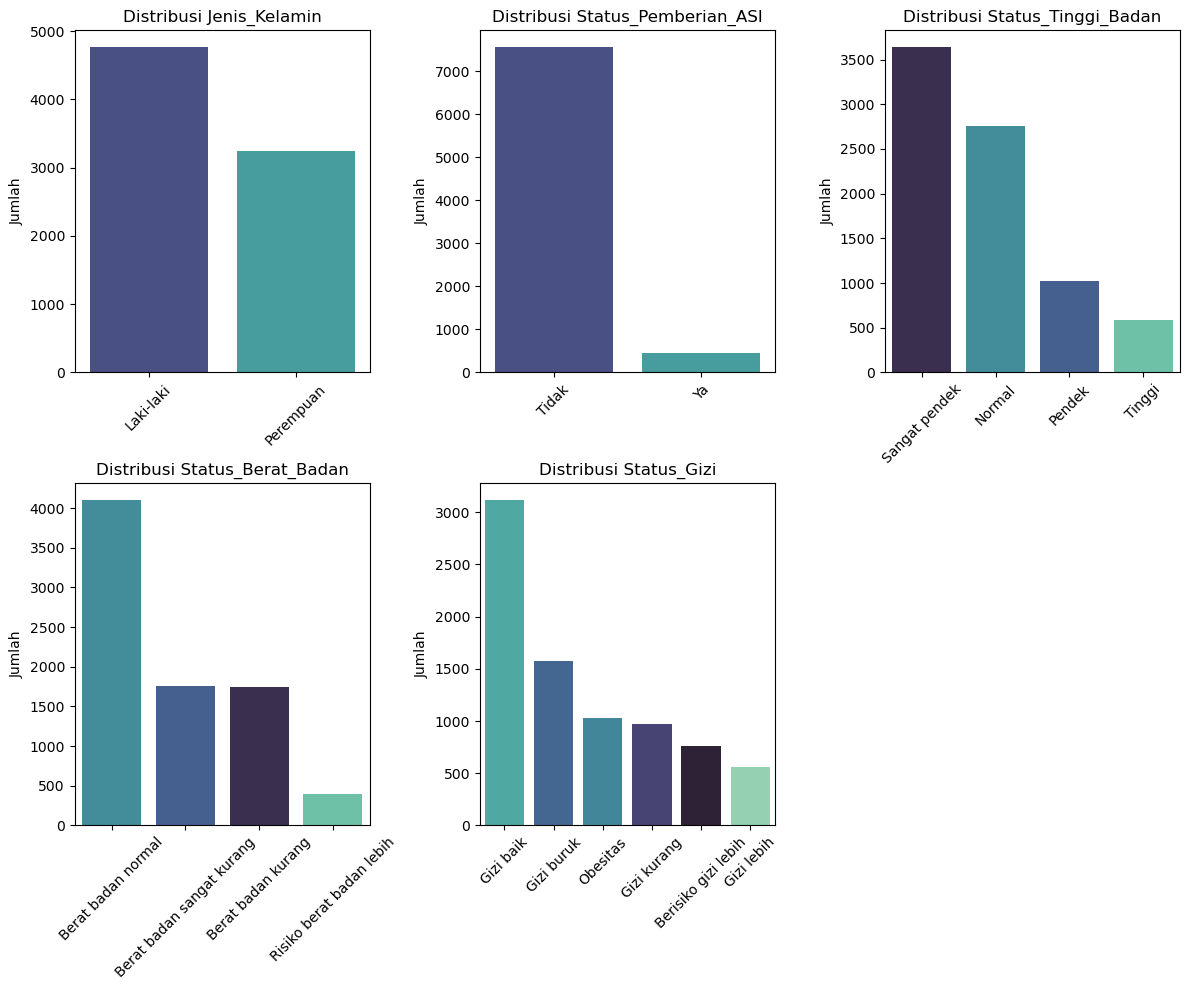

In [13]:
# visualisasi distribusi kolom kategori
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(categorical) / 2)), figsize=(12, 10))
axes = axes.flatten() if len(categorical) > 1 else [axes]

for ax, col in zip(axes, categorical):
    sns.countplot(x=df_vis[col], order=df_vis[col].value_counts().index, ax=ax, hue=df_vis[col], palette="mako", legend=False)
    ax.set_title(f"Distribusi {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Jumlah")
    ax.tick_params(axis='x', rotation=45)

for i in range(len(categorical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

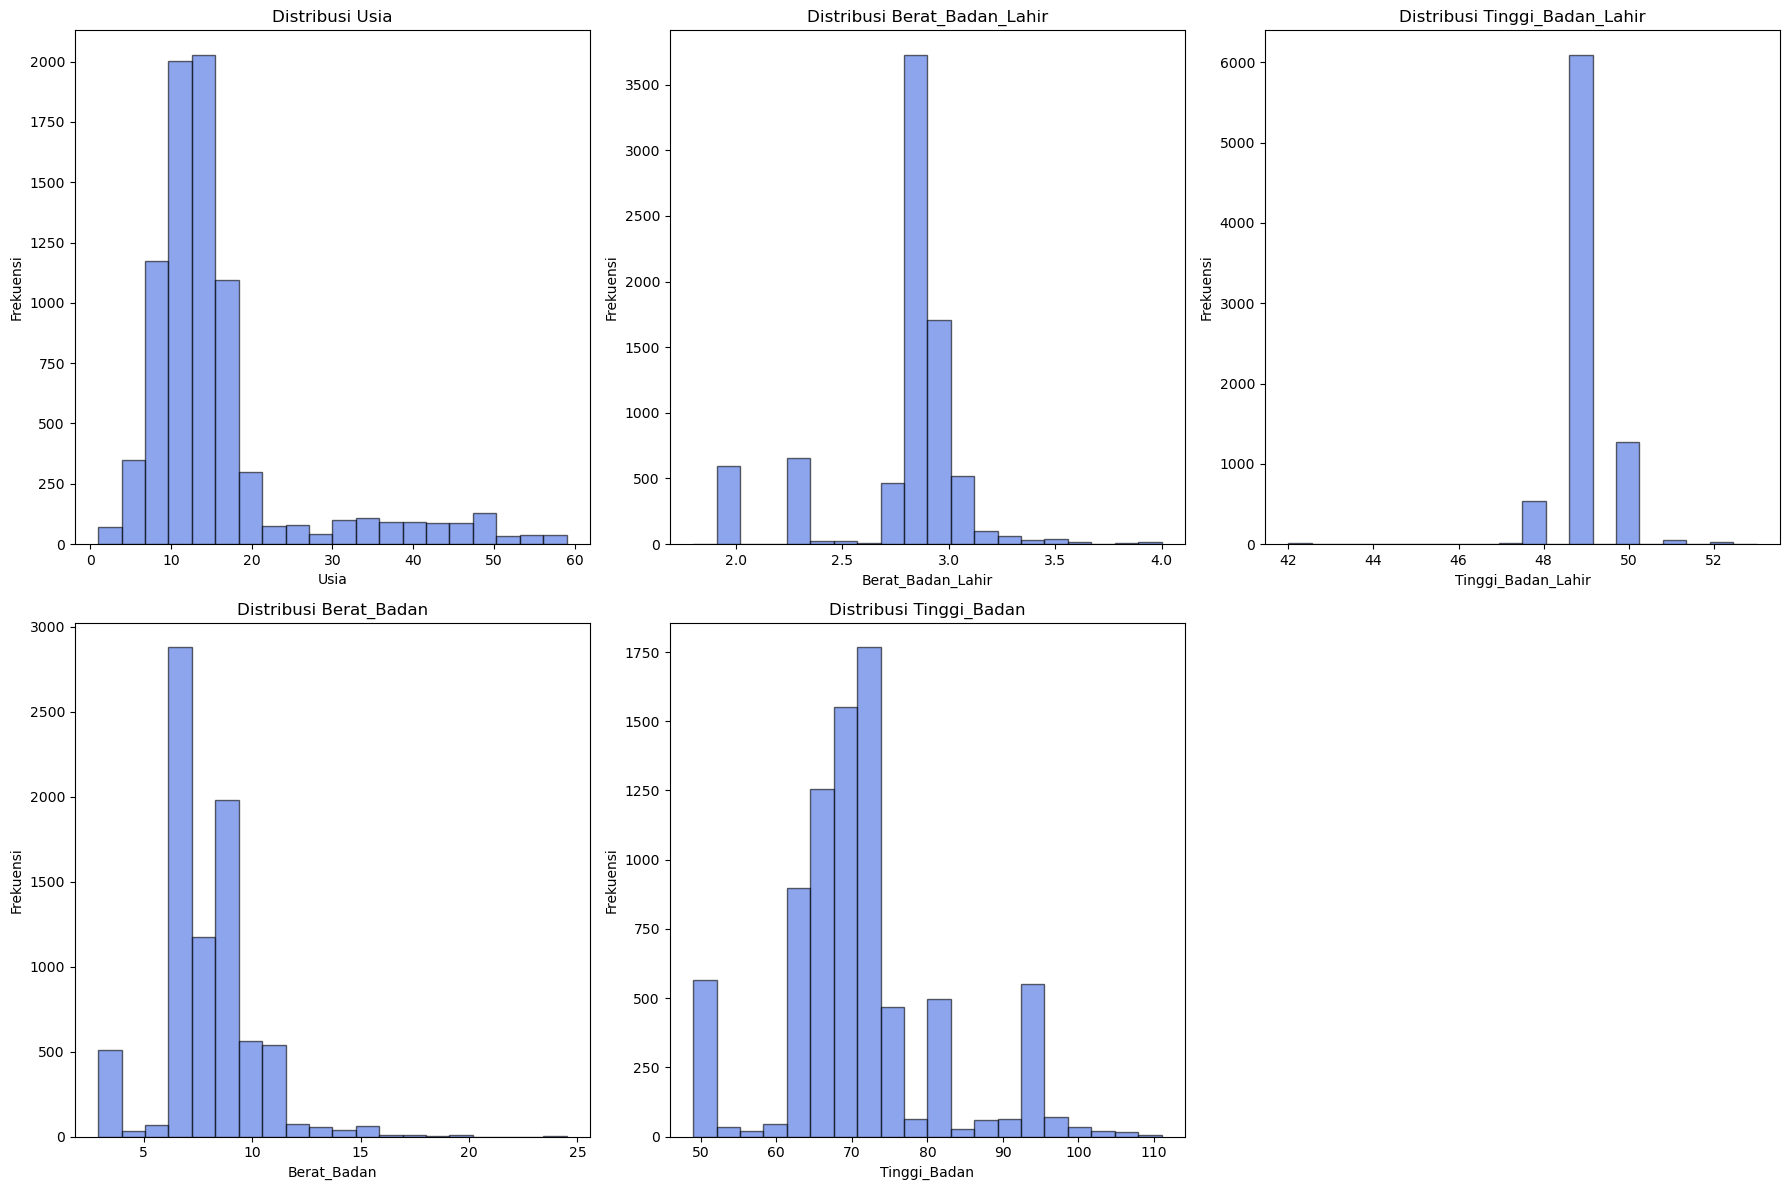

In [14]:
# Visualisasi distribusi kolom numerik
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical) / 3)), ncols=3, figsize=(18, 12))
axes = axes.flatten()

for ax, col in zip(axes, numerical):
    ax.hist(df_vis[col], bins=20, alpha=0.6, color='royalblue', edgecolor='black')
    ax.set_title(f"Distribusi {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frekuensi")

for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

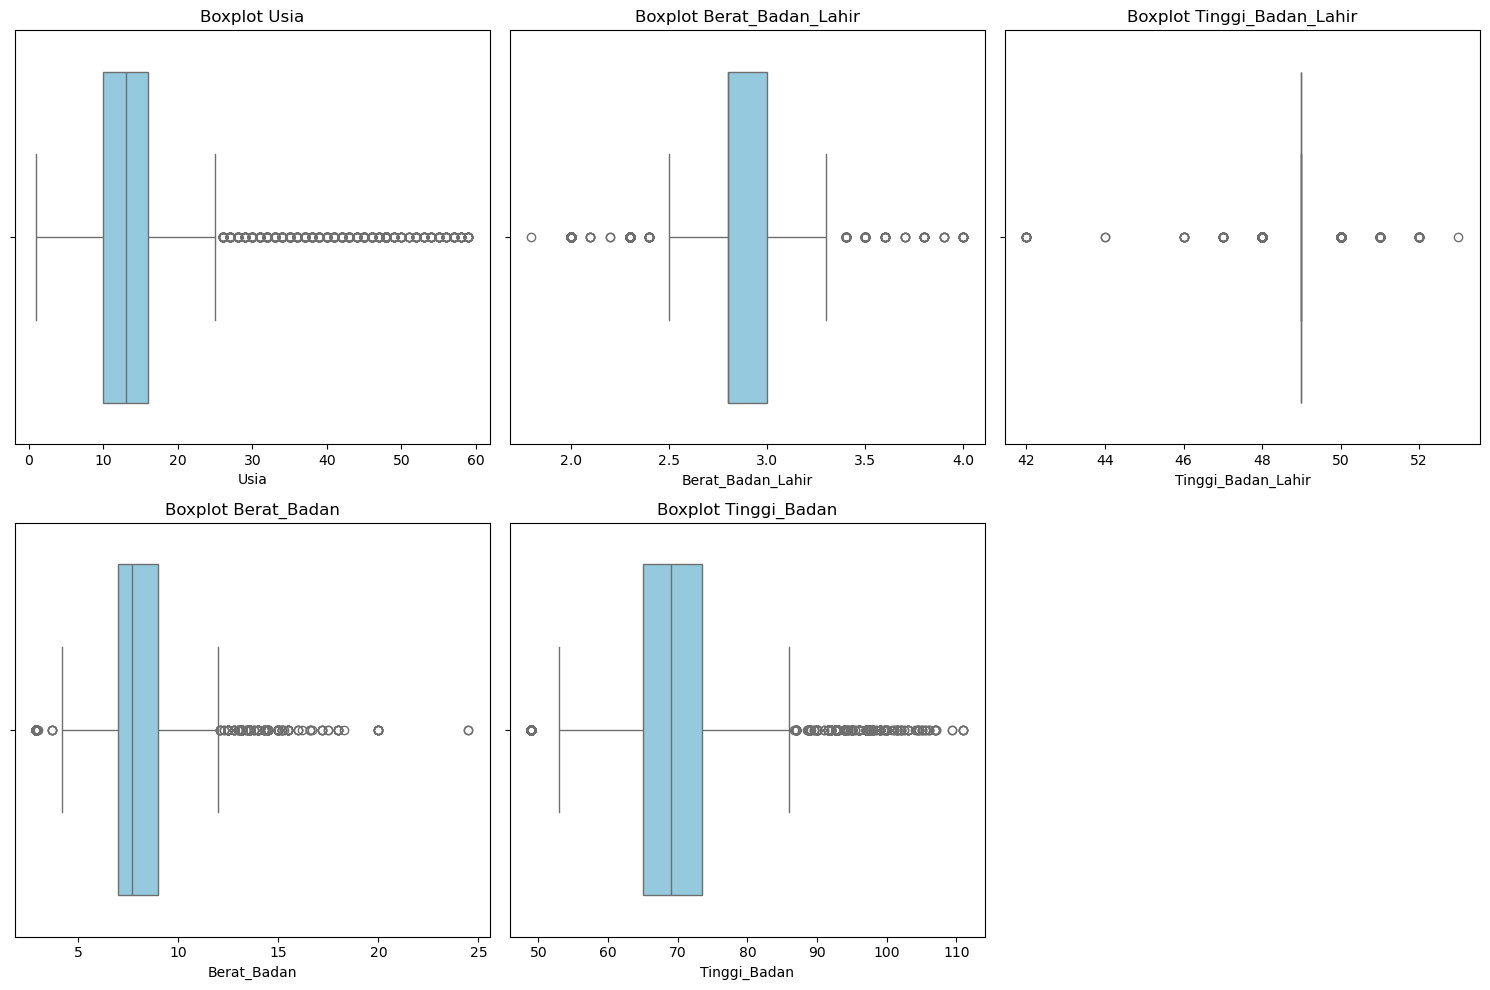

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misal data kamu sudah ada di DataFrame bernama df
# Gantilah 'df' dengan nama DataFrame kamu kalau berbeda

# Pilih kolom numerik
numerical_cols = df_vis.select_dtypes(include=['int64', 'float64']).columns

# Buat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.show()


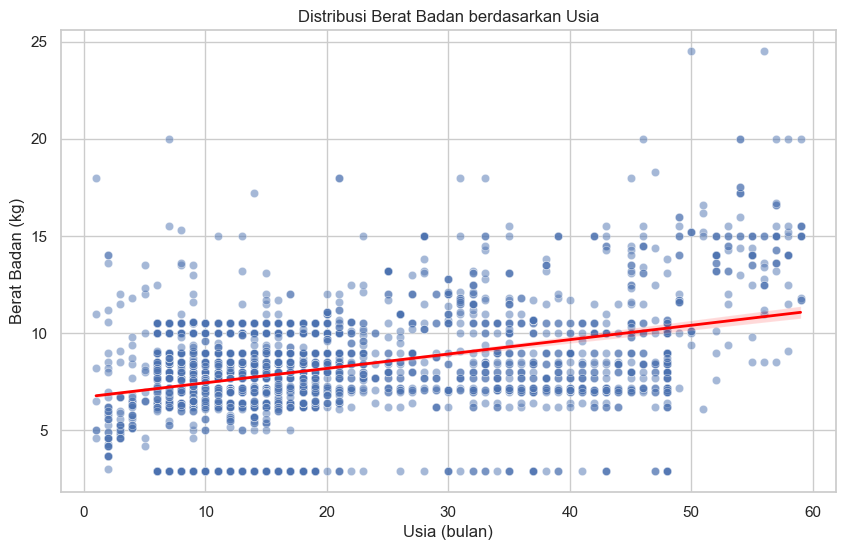

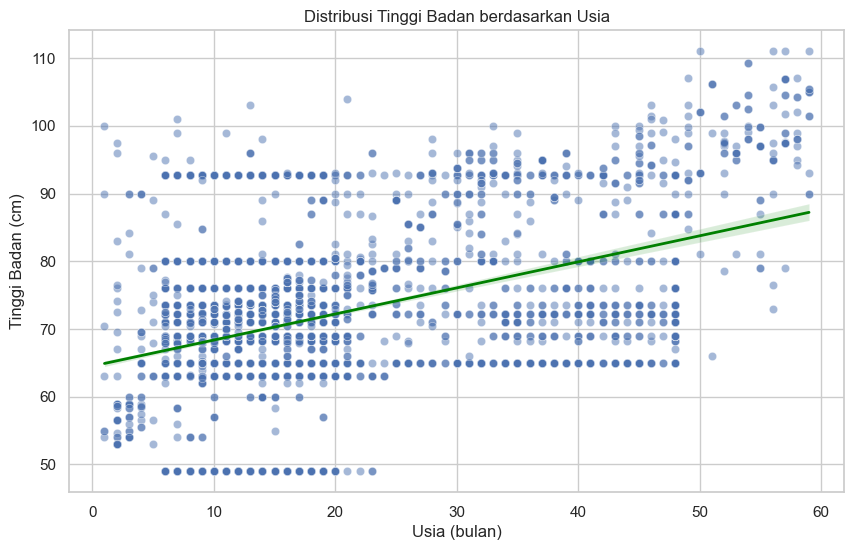

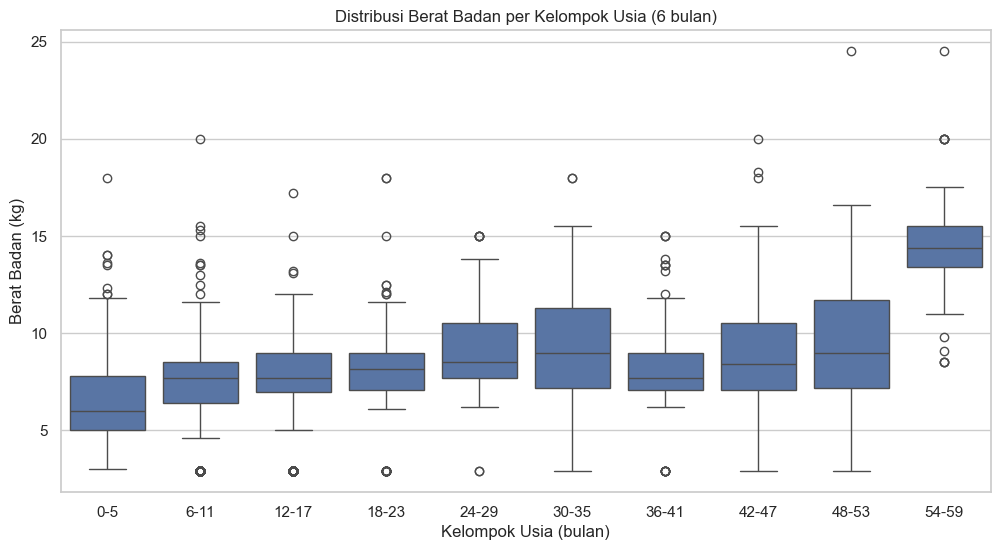

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Misal data kamu sudah di-load ke DataFrame bernama df_vis
# df_vis = pd.read_csv('data.csv')

# Buat kolom kelompok usia (misal per 6 bulan)
bins = list(range(0, 65, 6))  # 0,6,12,...60
labels = [f'{b}-{b+5}' for b in bins[:-1]]
df_vis['Kelompok_Usia'] = pd.cut(df_vis['Usia'], bins=bins, labels=labels, right=False)

# Set style seaborn
sns.set(style="whitegrid")

# Scatter plot Berat Badan vs Usia dengan garis regresi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vis, x='Usia', y='Berat_Badan', alpha=0.5)
sns.regplot(data=df_vis, x='Usia', y='Berat_Badan', scatter=False, color='red', line_kws={"lw":2})
plt.title('Distribusi Berat Badan berdasarkan Usia')
plt.xlabel('Usia (bulan)')
plt.ylabel('Berat Badan (kg)')
plt.show()

# Scatter plot Tinggi Badan vs Usia dengan garis regresi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vis, x='Usia', y='Tinggi_Badan', alpha=0.5)
sns.regplot(data=df_vis, x='Usia', y='Tinggi_Badan', scatter=False, color='green', line_kws={"lw":2})
plt.title('Distribusi Tinggi Badan berdasarkan Usia')
plt.xlabel('Usia (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

# Boxplot Berat Badan per Kelompok Usia
plt.figure(figsize=(12,6))
sns.boxplot(data=df_vis, x='Kelompok_Usia', y='Berat_Badan')
plt.title('Distribusi Berat Badan per Kelompok Usia (6 bulan)')
plt.xlabel('Kelompok Usia (bulan)')
plt.ylabel('Berat Badan (kg)')
plt.show()

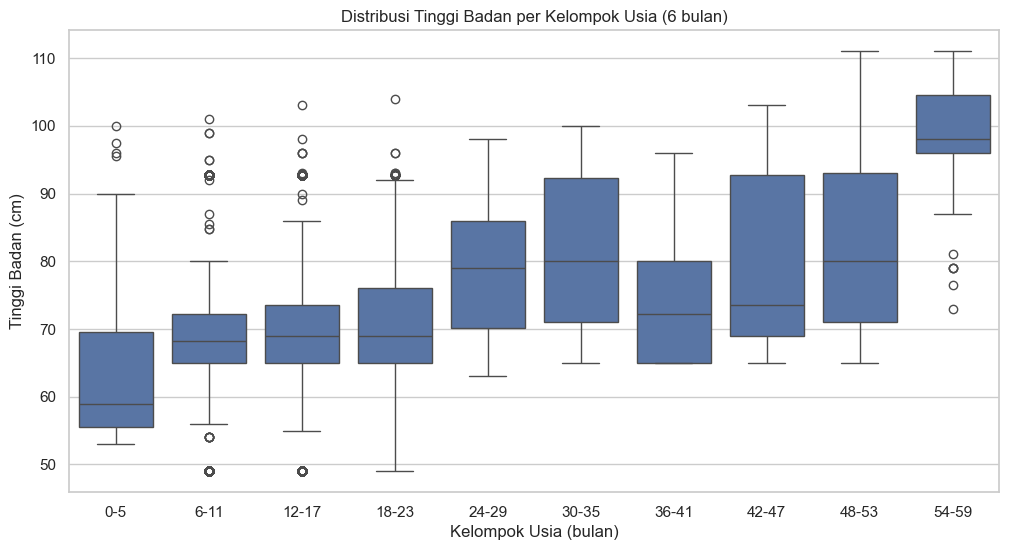

In [21]:
# Boxplot Tinggi Badan per Kelompok Usia
plt.figure(figsize=(12,6))
sns.boxplot(data=df_vis, x='Kelompok_Usia', y='Tinggi_Badan')
plt.title('Distribusi Tinggi Badan per Kelompok Usia (6 bulan)')
plt.xlabel('Kelompok Usia (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

In [22]:
df_vis.columns

Index(['Jenis_Kelamin', 'Usia', 'Berat_Badan_Lahir', 'Tinggi_Badan_Lahir',
       'Berat_Badan', 'Tinggi_Badan', 'Status_Pemberian_ASI',
       'Status_Tinggi_Badan', 'Status_Berat_Badan', 'Status_Gizi',
       'Kelompok_Usia'],
      dtype='object')

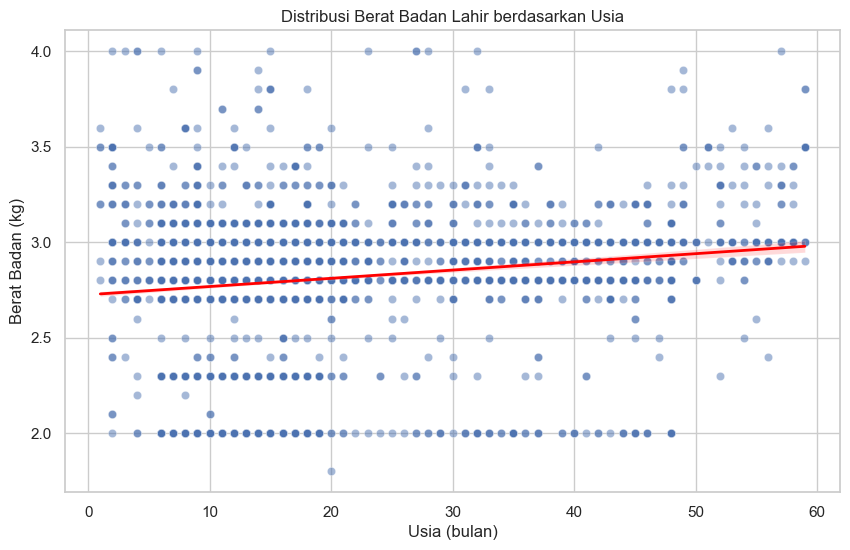

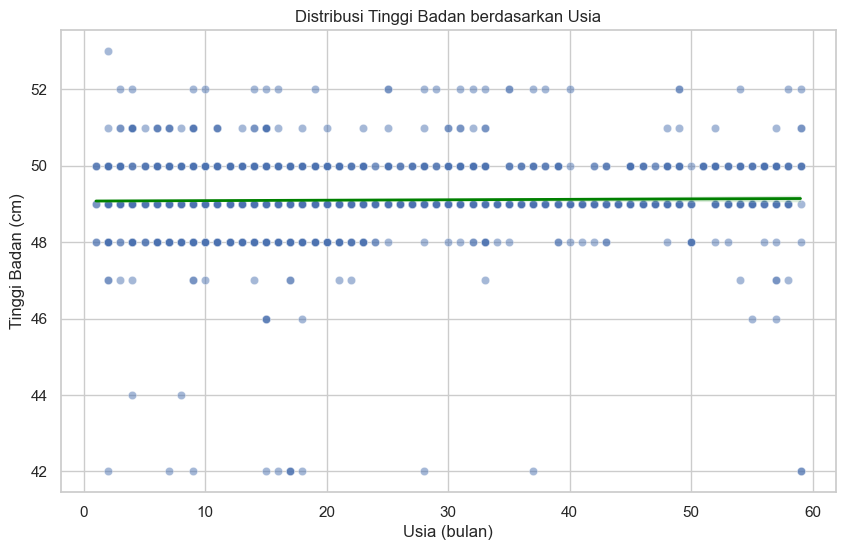

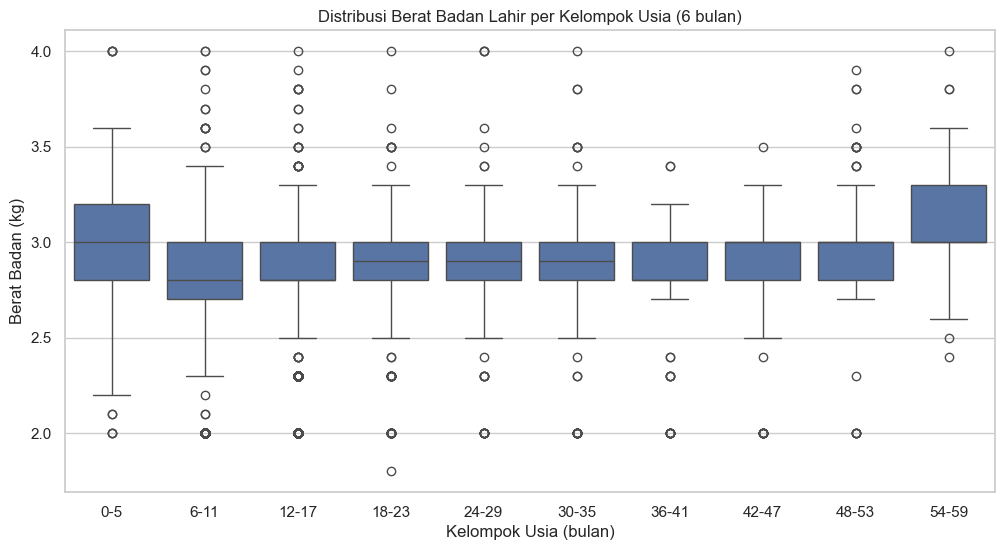

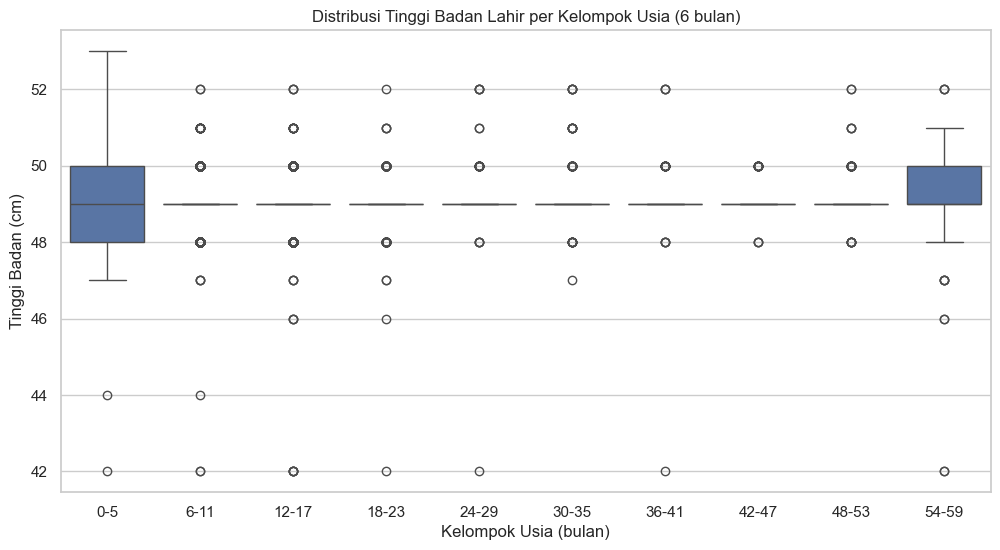

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Misal data kamu sudah di-load ke DataFrame bernama df_vis
# df_vis = pd.read_csv('data.csv')

# Buat kolom kelompok usia (misal per 6 bulan)
bins = list(range(0, 65, 6))  # 0,6,12,...60
labels = [f'{b}-{b+5}' for b in bins[:-1]]
df_vis['Kelompok_Usia'] = pd.cut(df_vis['Usia'], bins=bins, labels=labels, right=False)

# Set style seaborn
sns.set(style="whitegrid")

# Scatter plot Berat Badan vs Usia dengan garis regresi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vis, x='Usia', y='Berat_Badan_Lahir', alpha=0.5)
sns.regplot(data=df_vis, x='Usia', y='Berat_Badan_Lahir', scatter=False, color='red', line_kws={"lw":2})
plt.title('Distribusi Berat Badan Lahir berdasarkan Usia')
plt.xlabel('Usia (bulan)')
plt.ylabel('Berat Badan (kg)')
plt.show()

# Scatter plot Tinggi Badan vs Usia dengan garis regresi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_vis, x='Usia', y='Tinggi_Badan_Lahir', alpha=0.5)
sns.regplot(data=df_vis, x='Usia', y='Tinggi_Badan_Lahir', scatter=False, color='green', line_kws={"lw":2})
plt.title('Distribusi Tinggi Badan berdasarkan Usia')
plt.xlabel('Usia (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

# Boxplot Berat Badan per Kelompok Usia
plt.figure(figsize=(12,6))
sns.boxplot(data=df_vis, x='Kelompok_Usia', y='Berat_Badan_Lahir')
plt.title('Distribusi Berat Badan Lahir per Kelompok Usia (6 bulan)')
plt.xlabel('Kelompok Usia (bulan)')
plt.ylabel('Berat Badan (kg)')
plt.show()

# Boxplot Tinggi Badan per Kelompok Usia
plt.figure(figsize=(12,6))
sns.boxplot(data=df_vis, x='Kelompok_Usia', y='Tinggi_Badan_Lahir')
plt.title('Distribusi Tinggi Badan Lahir per Kelompok Usia (6 bulan)')
plt.xlabel('Kelompok Usia (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()


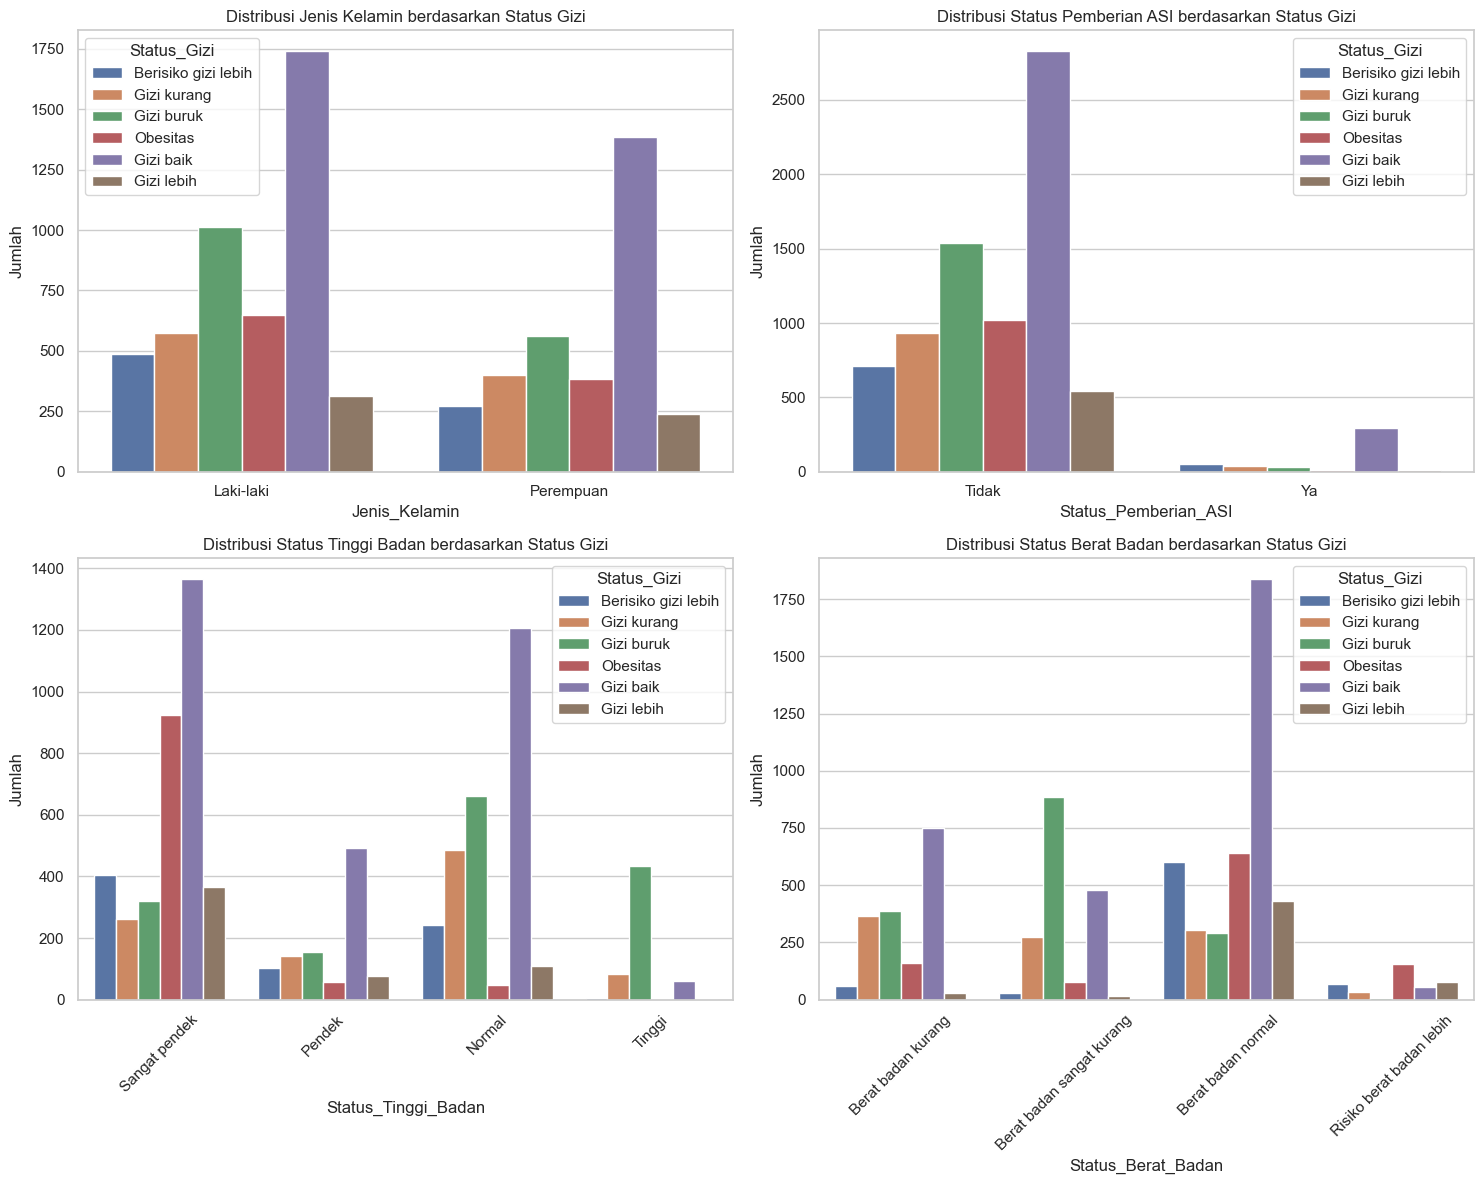

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 baris 2 kolom untuk 4 plot

# 1. Jenis Kelamin vs Status Gizi
sns.countplot(data=df_vis, x='Jenis_Kelamin', hue='Status_Gizi', ax=axes[0,0])
axes[0,0].set_title('Distribusi Jenis Kelamin berdasarkan Status Gizi')
axes[0,0].set_ylabel('Jumlah')

# 2. Status Pemberian ASI vs Status Gizi
sns.countplot(data=df_vis, x='Status_Pemberian_ASI', hue='Status_Gizi', ax=axes[0,1])
axes[0,1].set_title('Distribusi Status Pemberian ASI berdasarkan Status Gizi')
axes[0,1].set_ylabel('Jumlah')

# 3. Status Tinggi Badan vs Status Gizi
sns.countplot(data=df_vis, x='Status_Tinggi_Badan', hue='Status_Gizi', ax=axes[1,0])
axes[1,0].set_title('Distribusi Status Tinggi Badan berdasarkan Status Gizi')
axes[1,0].set_ylabel('Jumlah')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Status Berat Badan vs Status Gizi
sns.countplot(data=df_vis, x='Status_Berat_Badan', hue='Status_Gizi', ax=axes[1,1])
axes[1,1].set_title('Distribusi Status Berat Badan berdasarkan Status Gizi')
axes[1,1].set_ylabel('Jumlah')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


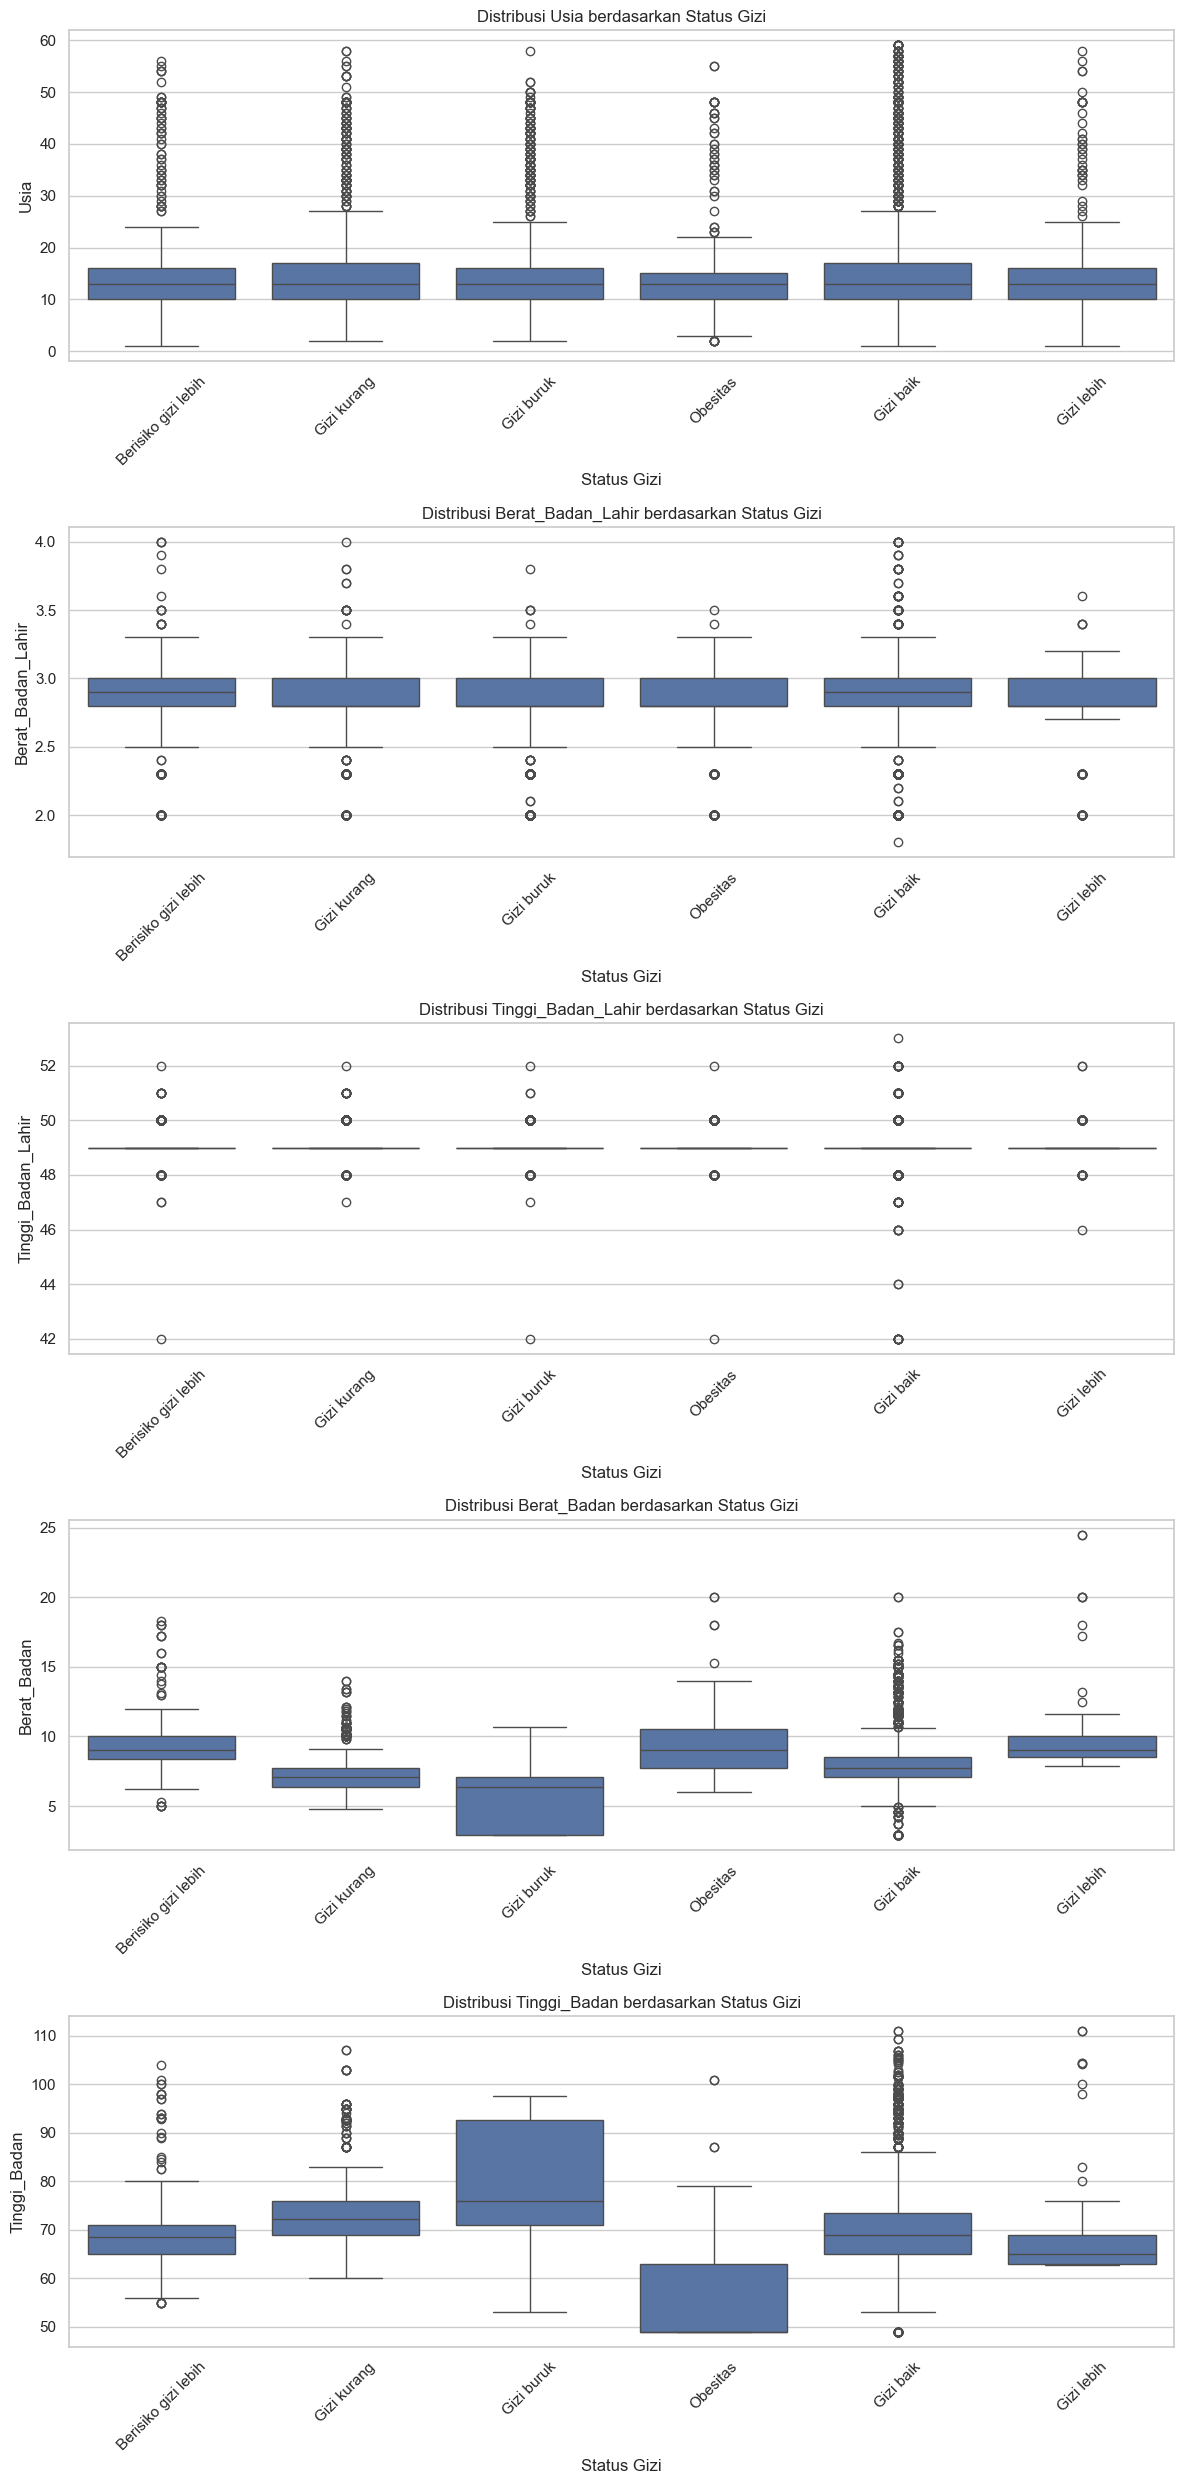

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variabel numerik yang ingin divisualisasi
numerik_cols = ['Usia', 'Berat_Badan_Lahir', 'Tinggi_Badan_Lahir', 'Berat_Badan', 'Tinggi_Badan']

sns.set(style="whitegrid")
fig, axes = plt.subplots(len(numerik_cols), 1, figsize=(12, 5*len(numerik_cols)))

for i, col in enumerate(numerik_cols):
    sns.boxplot(data=df_vis, x='Status_Gizi', y=col, ax=axes[i])
    axes[i].set_title(f'Distribusi {col} berdasarkan Status Gizi')
    axes[i].set_xlabel('Status Gizi')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [16]:
df_corr = df_vis.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder

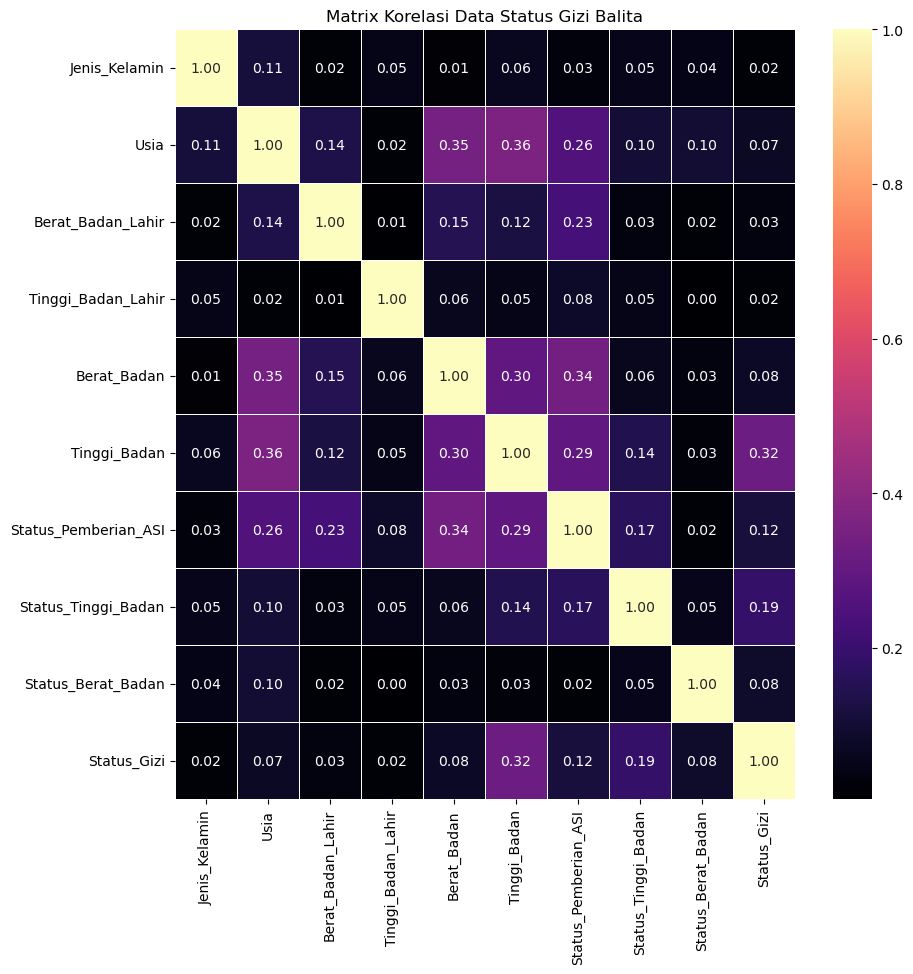

In [18]:
label_encoder = LabelEncoder()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = label_encoder.fit_transform(df_corr[col])

corr_matrix = df_corr.corr().abs()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=.5)
plt.title('Matrix Korelasi Data Status Gizi Balita')
plt.show()

In [19]:
correlation = df_corr.corr()["Status Gizi"].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap="magma", fmt=".2f", linewidths=0.5)

plt.title("Heatmap Korelasi terhadap Status Gizi", fontsize=14)
plt.show()

KeyError: 'Status Gizi'